In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos la base de datos
df_delivery = pd.read_csv(r"C:\Users\Flor Guindo\Documents\CURSO DATA ANALYTICS\fake_orders_test.csv")
df_delivery.head()

,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96


In [3]:
# Nombramos las columnas 
columnas = ['order_id', 'activation_time_local', 'country_code', 'store_address', 'final_status', 'payment_status', 'products', 'products_total', 'purchase_total_price']
df_delivery.columns = columnas
df_delivery.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96


### Respuesta 1:`` 
En tu opinión, ¿cuáles son los tres principales KPIs para IronHack Delivery? Clasificados por orden de importancia decreciente. Explica tu elección y trata de hacer una estimación fundamentada de su valor. Proporciona una explicación paso a paso de tu estimación. ¿Cómo los mejorarías? Nota: Ignora los KPIs financieros puros que aplican a todos los negocio ``.

Los principales KPIs para IronHack Delivery, en base a los datos disponibles, podrian ser :
1) Tasa de finalizacion de pedidos:
   Es importante conocer nuestra tasa de éxitos en las entregas para asegurarnos de cumplir con nuestro trabajo. De esta manera nuestros clientes podrán volver a elegir nuestros servicios. Sumado a que nuestro modelo de negocios genera ingresos en base a las entregas.
   Para calcular esta métrica haríamos la comparación entre la cantidad de pedidos entregados/cantidad total de pedidos.
   No contamos con la informacion suficiente para conocer a que se deben estas cancelaciones, pero podrían ser por retrasos en la logística, dificultades a la hora de realizar el pago o no disponer del stock de los productos solicitados. Cada una de estas dificultades debería ser tratada de manera diferente.
2) Tasa de pagos rechazados o fallidos:
   Es importante conocer la tasa de pagos fallidos ya que son pagos que deberían ingresarnos y no lo estan haciendo, lo cual podría generar un faltante de dinero y/o tambien podrían generar la cancelación de pedidos por dificultades en el pago.
   Para calcular esta metrica hariamos la comparación entre la cantidad de pagos rechazados (no cancelados)/cantidad total de pedidos (no cancelados)
   Para solucionar este problema, podríamos facilitar otros medios de pago y evaluar posible fallas en la plataforma de pago. 
3) Valor promedio de compras y/o cantidad de productos:
   Para conocer mejor nuestro mercado y suponiendo que hay una relación directa entre el valor de la compra y nuestra ganancia por los servicios ofrecidos, seria interesante conocer este valor.
   Para ello deberiamos sumar el valor total de las compras realizadas y dividirlo sobre el total de pedidos. Para calcular la cantidad de productos haríamos lo mismo pero con la cantidad de productos por pedido.
   Para mejorar esta métrica podriamos ofrecer promociones para incentivar el volumen de compra.
    
Cabe destacar que se podría hacer un analisis en general de estas métricas y otro analisis por pais para evaluar en profundidad el funcionamiento en cada región.
Otras opciones que serían interesantes de analizar sería la frecuencia de uso del servicio por parte de nuestros clientes, ya que en opinión personal es la métrica más relevante que sirve para conocer la satisfacción de un cliente. Solo que no contamos con los datos suficientes para calcularlo.

In [5]:
# Sacamos la diferencia de precios entre products_total	y purchase_total_price, para conocer la diferencia por la cual un pedido seria subatorizado.
# Solo vamos a considerar los pedidos No cancelados, ya que la diferencia entre pagos de un pedido cancelado no nos interesaría.
df_delivery['diferencia precios'] = df_delivery['products_total'] - df_delivery['purchase_total_price']
df_delivery_aceptados = df_delivery[df_delivery['final_status'] != 'CanceledStatus']
df_delivery_aceptados

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,0.00
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,0.00
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,-0.08
5,33524023,2019-03-10 23:57:06.000000,EG,73739,DeliveredStatus,PAID,3,10.19,1.61,8.58
...,...,...,...,...,...,...,...,...,...,...
60392,31961779,2019-03-01 00:09:57.000000,TR,34953,DeliveredStatus,PAID,1,1.80,1.80,0.00
60393,32002340,2019-03-01 00:09:21.000000,AR,14455,DeliveredStatus,NOT_PAID,2,5.14,5.14,0.00
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67


In [6]:
# Clasificamos pedidos subatorizados
pedidos_subautorizados = df_delivery_aceptados[df_delivery_aceptados['products_total'] < df_delivery_aceptados['purchase_total_price']]
pedidos_subautorizados

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,-0.08
6,33511759,2019-03-10 23:55:21.000000,TR,47493,DeliveredStatus,PAID,2,2.37,2.45,-0.08
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,-2.10
...,...,...,...,...,...,...,...,...,...,...
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,-3.45
60388,32002620,2019-03-01 00:14:57.000000,AR,62623,DeliveredStatus,PAID,2,1.79,5.36,-3.57
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67


In [7]:
#4.1 ¿Qué porcentaje de pedidos están subautorizados?
# Calculamos la tasa de pedidos subatorizados sobre el total de pedidos aceptados.
tasa_de_pedidos_subautorizados = len(pedidos_subautorizados)/len(df_delivery_aceptados)
tasa_de_pedidos_subautorizados = tasa_de_pedidos_subautorizados *100
print('Respuesta 4.1:')
print(f'Un {tasa_de_pedidos_subautorizados:.2f}% de los pedidos estan subautorizados')

Respuesta 4.1:
Un 63.90% de los pedidos estan subautorizados


In [8]:
# Calculamos el nuevo precio con el incremental del 20%
df_delivery_aceptados['products_total_incremental'] = df_delivery_aceptados['products_total'] * 1.20
df_delivery_aceptados

C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_13200\2279959613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_aceptados['products_total_incremental'] = df_delivery_aceptados['products_total'] * 1.20


,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,products_total_incremental
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,0.00,4.512
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,0.00,3.432
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,3.432
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,-0.08,2.256
5,33524023,2019-03-10 23:57:06.000000,EG,73739,DeliveredStatus,PAID,3,10.19,1.61,8.58,12.228
...,...,...,...,...,...,...,...,...,...,...,...
60392,31961779,2019-03-01 00:09:57.000000,TR,34953,DeliveredStatus,PAID,1,1.80,1.80,0.00,2.160
60393,32002340,2019-03-01 00:09:21.000000,AR,14455,DeliveredStatus,NOT_PAID,2,5.14,5.14,0.00,6.168
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16,12.204
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67,5.088


In [9]:
# Clasificamos pedidos subatorizados teniendo en cuenta el incremental del 20%
pedidos_subautorizados_incremental = df_delivery_aceptados[df_delivery_aceptados['products_total_incremental'] < df_delivery_aceptados['purchase_total_price']]
pedidos_subautorizados_incremental

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,products_total_incremental
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,3.432
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12,2.460
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,-2.10,9.720
19,33509944,2019-03-10 23:48:55.000000,TR,44528,DeliveredStatus,PAID,2,4.42,5.73,-1.31,5.304
29,33503904,2019-03-10 23:43:03.000000,TR,34471,DeliveredStatus,PAID,1,5.03,10.71,-5.68,6.036
...,...,...,...,...,...,...,...,...,...,...,...
60370,32004484,2019-03-01 01:06:46.000000,AR,33382,DeliveredStatus,PAID,2,9.83,21.44,-11.61,11.796
60372,31969645,2019-03-01 00:57:47.000000,TR,44473,DeliveredStatus,PAID,1,3.28,6.56,-3.28,3.936
60373,31968802,2019-03-01 00:51:19.000000,TR,52885,DeliveredStatus,PAID,1,2.46,5.25,-2.79,2.952
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,-3.45,4.128


In [10]:
#4.2 ¿Qué porcentaje de pedidos se autorizarían correctamente con una autorización incremental (+20%) sobre el monto en el checkout?
tasa_de_pedidos_subautorizados_incremental = len(pedidos_subautorizados_incremental)/len(df_delivery_aceptados)
tasa_de_pedidos_subautorizados_incremental = tasa_de_pedidos_subautorizados_incremental *100
print('Respuesta 4.2:')
print(f'Un {tasa_de_pedidos_subautorizados_incremental:.2f}% de los pedidos estarían subautorizados con una autorizacion incremental del 20%')
tasa_de_pedidos_autorizados_correctamente = 100 - tasa_de_pedidos_subautorizados_incremental
print(f'Un {tasa_de_pedidos_autorizados_correctamente:.2f}% de los pedidos estarían autorizados correctamente con una autorización incremental del 20%')

Respuesta 4.2:
Un 34.32% de los pedidos estarían subautorizados con una autorizacion incremental del 20%
Un 65.68% de los pedidos estarían autorizados correctamente con una autorización incremental del 20%


In [11]:
# Creamos una funcion para calcular las tasas por pais
def calcular_tasas_por_pais(df):
    resultados = []

    for country_code, df_country in df.groupby('country_code'):
        # Pedidos subautorizados sin el incremento
        pedidos_subautorizados_country = df_country[df_country['products_total'] < df_country['purchase_total_price']]
        tasa_de_pedidos_subautorizados_country = (len(pedidos_subautorizados_country) / len(df_country)) * 100

        # Pedidos subautorizados con el incremento
        pedidos_subautorizados_incremental_country = df_country[df_country['products_total_incremental'] < df_country['purchase_total_price']]
        tasa_de_pedidos_subautorizados_incremental_country = (len(pedidos_subautorizados_incremental_country) / len(df_country)) * 100

        # Tasa de pedidos autorizados correctamente con el incremento
        tasa_de_pedidos_autorizados_correctamente_country = 100 - tasa_de_pedidos_subautorizados_incremental_country
        
        resultados.append({
            'country_code': country_code,
            '%_pedidos_subautorizados': tasa_de_pedidos_subautorizados_country,
            '%_pedidos_subautorizados_incremental': tasa_de_pedidos_subautorizados_incremental_country,
            'tasa_de_pedidos_autorizados_correctamente_sin_incremental': round(100 - tasa_de_pedidos_subautorizados_country, 2),
            'tasa_de_pedidos_autorizados_correctamente_con_incremental': round(tasa_de_pedidos_autorizados_correctamente_country, 2)
        })
    
    # Crear un DataFrame con los resultados por país
    df_resultados = pd.DataFrame(resultados)
    return df_resultados

df_resultados_por_pais = calcular_tasas_por_pais(df_delivery_aceptados)
df_resultados_por_pais = df_resultados_por_pais.sort_values(by='%_pedidos_subautorizados', ascending=False)
df_resultados_por_pais 

,country_code,%_pedidos_subautorizados,%_pedidos_subautorizados_incremental,tasa_de_pedidos_autorizados_correctamente_sin_incremental,tasa_de_pedidos_autorizados_correctamente_con_incremental
1,BR,100.000000,100.000000,0.00,0.00
3,CL,99.895288,99.895288,0.10,0.10
6,EC,70.946246,41.270546,29.05,58.73
0,AR,70.315977,38.869604,29.68,61.13
7,EG,70.223325,38.523573,29.78,61.48
9,FR,70.168281,34.982152,29.83,65.02
5,DO,68.409586,41.176471,31.59,58.82
18,PT,68.253968,41.931217,31.75,58.07
8,ES,67.150004,30.730094,32.85,69.27
15,PA,66.816143,35.426009,33.18,64.57


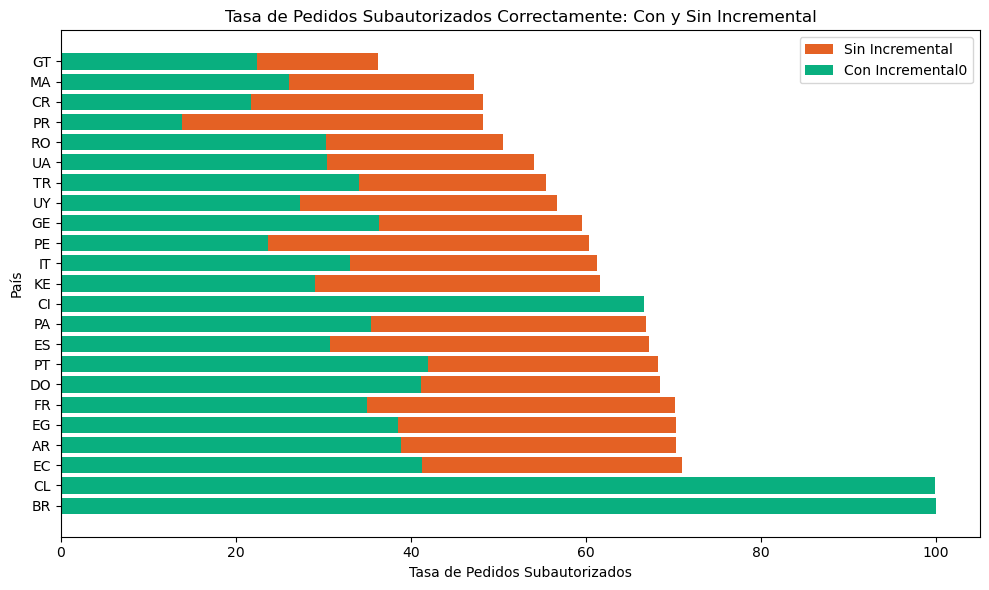

In [115]:
# Para una mejor visualización graficamos los datos obtenidos.
plt.figure(figsize=(10, 6))
plt.barh(df_resultados_por_pais['country_code'], df_resultados_por_pais['%_pedidos_subautorizados'], label='Sin Incremental', color='#e46124')
plt.barh(df_resultados_por_pais['country_code'], df_resultados_por_pais['%_pedidos_subautorizados_incremental'], label='Con Incremental0', color='#09af7f')
plt.xlabel('Tasa de Pedidos Subautorizados')
plt.ylabel('País')
plt.title('Tasa de Pedidos Subautorizados Correctamente: Con y Sin Incremental')
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

#### Respuesta 4.3

``¿Hay diferencias cuando se dividen por país?``

Podemos observar que en paises como Colombia y Brasil todos los pedidos están subautorizados y lo seguirían estando incluso con el incremental del 20%.
Igual en el caso de Costa de Marfil, los pedidos subautorizados no disminuirian considerando un incremental del 20%.

Vemos que en la mayoria de los paises los pedidos subatorizados rondan entre el 50 y 60%. Mientras que considerando un incremental del 20% estos numero se reducen de manera considerable entre un 20 y 30%.

A modo de información, el pais con menor tasa de pedidos subautorizados es Guatemala, mientras que Puerto Rico es aquel que más pedidos pasaría a autorizar con un aumento incremental del 20%.


In [14]:
# Calculamos cual seria el aumento necesario para autorizar cada pedido.
pedidos_subautorizados_incremental['Aumento extra'] = pedidos_subautorizados_incremental['products_total_incremental'] - pedidos_subautorizados_incremental['purchase_total_price']
pedidos_subautorizados_incremental_limpio = pedidos_subautorizados_incremental[pedidos_subautorizados_incremental['products_total_incremental'] > 0]
pedidos_subautorizados_incremental_limpio['Aumento extra'] = pedidos_subautorizados_incremental_limpio['Aumento extra'].abs()
pedidos_subautorizados_incremental_limpio.head()

C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_13200\783975318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_subautorizados_incremental['Aumento extra'] = pedidos_subautorizados_incremental['products_total_incremental'] - pedidos_subautorizados_incremental['purchase_total_price']
C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_13200\783975318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_subautorizados_incremental_limpio['Aumento extra'] = pedidos_subautorizados_incremental_

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,3.432,3.048
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12,2.460,7.710
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,-2.10,9.720,0.480
19,33509944,2019-03-10 23:48:55.000000,TR,44528,DeliveredStatus,PAID,2,4.42,5.73,-1.31,5.304,0.426
29,33503904,2019-03-10 23:43:03.000000,TR,34471,DeliveredStatus,PAID,1,5.03,10.71,-5.68,6.036,4.674


In [15]:
# Calculamos cual seria el aumento necesario en porcentaje para autorizar cada pedido.
pedidos_subautorizados_incremental_limpio['aumento_necesario_extra'] = pedidos_subautorizados_incremental_limpio['Aumento extra'] / pedidos_subautorizados_incremental_limpio['products_total_incremental']
pedidos_subautorizados_incremental_limpio['aumento_necesario_extra'] = pedidos_subautorizados_incremental_limpio['aumento_necesario_extra'] * 100
pedidos_subautorizados_incremental_limpio['aumento_necesario_extra'] = round(pedidos_subautorizados_incremental_limpio['aumento_necesario_extra'].abs(), 2)
pedidos_subautorizados_incremental_limpio.tail()

C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_13200\3634076686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_subautorizados_incremental_limpio['aumento_necesario_extra'] = pedidos_subautorizados_incremental_limpio['Aumento extra'] / pedidos_subautorizados_incremental_limpio['products_total_incremental']
C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_13200\3634076686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_subautorizados_incremental_limpio['aumento_necesario_extra'] =

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra,aumento_necesario_extra
60370,32004484,2019-03-01 01:06:46.000000,AR,33382,DeliveredStatus,PAID,2,9.83,21.44,-11.61,11.796,9.644,81.76
60372,31969645,2019-03-01 00:57:47.000000,TR,44473,DeliveredStatus,PAID,1,3.28,6.56,-3.28,3.936,2.624,66.67
60373,31968802,2019-03-01 00:51:19.000000,TR,52885,DeliveredStatus,PAID,1,2.46,5.25,-2.79,2.952,2.298,77.85
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,-3.45,4.128,2.762,66.91
60388,32002620,2019-03-01 00:14:57.000000,AR,62623,DeliveredStatus,PAID,2,1.79,5.36,-3.57,2.148,3.212,149.53


In [16]:
# Buscamos el porcentaje de aumento necesario promedio y para los diferentes percentiles.
pedidos_subautorizados_incremental_limpio.describe()

,order_id,store_address,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra,aumento_necesario_extra
count,1.849700e+04,18497.000000,18497.000000,18497.000000,18497.000000,18497.000000,18497.000000,1.849700e+04,18497.000000
mean,3.278150e+07,41037.158566,2.887766,7.033763,13.031694,-5.997931,8.440515,4.591178e+00,715.131071
std,4.468055e+05,22432.803509,2.309304,7.064060,11.672006,7.454685,8.476873,7.170487e+00,3786.570063
min,3.150378e+07,190.000000,1.000000,0.010000,0.090000,-203.900000,0.012000,4.440892e-16,0.000000
25%,3.239529e+07,18150.000000,1.000000,2.570000,5.730000,-7.000000,3.084000,9.740000e-01,13.800000
50%,3.278700e+07,45101.000000,2.000000,5.030000,9.920000,-3.960000,6.036000,2.500000e+00,42.620000
75%,3.318667e+07,61973.000000,4.000000,9.250000,16.430000,-2.120000,11.100000,5.344000e+00,93.460000
max,3.356003e+07,74889.000000,20.000000,134.200000,237.880000,-0.020000,161.040000,1.971040e+02,197650.000000


In [17]:
# Identificamos el outlier que requiere de un 197.650% de aumento y lo quitamos del analisis
outlier = pedidos_subautorizados_incremental_limpio[pedidos_subautorizados_incremental_limpio['aumento_necesario_extra'] == 197650]
outlier

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra,aumento_necesario_extra
25962,32894816,2019-03-06 22:09:55.000000,CL,30328,DeliveredStatus,PAID,1,0.01,23.73,-23.72,0.012,23.718,197650.0


In [18]:
# Quitamos el outlier
pedidos_subautorizados_incremental_limpio2 = pedidos_subautorizados_incremental_limpio.drop(25962)
pedidos_subautorizados_incremental_limpio2

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra,aumento_necesario_extra
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,3.432,3.048,88.81
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12,2.460,7.710,313.41
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,-2.10,9.720,0.480,4.94
19,33509944,2019-03-10 23:48:55.000000,TR,44528,DeliveredStatus,PAID,2,4.42,5.73,-1.31,5.304,0.426,8.03
29,33503904,2019-03-10 23:43:03.000000,TR,34471,DeliveredStatus,PAID,1,5.03,10.71,-5.68,6.036,4.674,77.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60370,32004484,2019-03-01 01:06:46.000000,AR,33382,DeliveredStatus,PAID,2,9.83,21.44,-11.61,11.796,9.644,81.76
60372,31969645,2019-03-01 00:57:47.000000,TR,44473,DeliveredStatus,PAID,1,3.28,6.56,-3.28,3.936,2.624,66.67
60373,31968802,2019-03-01 00:51:19.000000,TR,52885,DeliveredStatus,PAID,1,2.46,5.25,-2.79,2.952,2.298,77.85
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,-3.45,4.128,2.762,66.91


In [19]:
# Buscamos el porcentaje de aumento necesario promedio y para los diferentes percentiles.
pedidos_subautorizados_incremental_limpio2.describe()

,order_id,store_address,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra,aumento_necesario_extra
count,1.849600e+04,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,1.849600e+04,18496.000000
mean,3.278149e+07,41037.737565,2.887868,7.034143,13.031115,-5.996973,8.440971,4.590144e+00,704.483641
std,4.468168e+05,22433.271742,2.309324,7.064063,11.672056,7.453748,8.476875,7.169302e+00,3498.829957
min,3.150378e+07,190.000000,1.000000,0.010000,0.090000,-203.900000,0.012000,4.440892e-16,0.000000
25%,3.239529e+07,18150.000000,1.000000,2.570000,5.730000,-7.000000,3.084000,9.740000e-01,13.797500
50%,3.278673e+07,45101.000000,2.000000,5.030000,9.920000,-3.960000,6.036000,2.500000e+00,42.610000
75%,3.318669e+07,61973.000000,4.000000,9.250000,16.430000,-2.120000,11.100000,5.342500e+00,93.452500
max,3.356003e+07,74889.000000,20.000000,134.200000,237.880000,-0.020000,161.040000,1.971040e+02,146233.330000


In [20]:
# Ordenamos el df porque siguen habiendo numeros demasiado altos que afectan al analisis y queremos ver de que valores estamos hablando.
df_ordenado = pedidos_subautorizados_incremental_limpio2.sort_values(by='aumento_necesario_extra', ascending=False)
df_ordenado

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra,aumento_necesario_extra
43664,32489364,2019-03-03 19:10:38.000000,CL,17322,DeliveredStatus,PAID,1,0.01,17.56,-17.55,0.012,1.754800e+01,146233.33
15425,33186806,2019-03-08 20:40:39.000000,CL,17325,DeliveredStatus,PAID,1,0.01,11.33,-11.32,0.012,1.131800e+01,94316.67
15282,33188174,2019-03-08 20:51:02.000000,CL,17325,DeliveredStatus,PAID,1,0.01,11.33,-11.32,0.012,1.131800e+01,94316.67
14326,33200110,2019-03-08 22:12:07.000000,CL,30334,DeliveredStatus,PAID,1,0.01,10.86,-10.85,0.012,1.084800e+01,90400.00
31065,32765222,2019-03-05 21:56:38.000000,CL,17327,DeliveredStatus,PAID,1,0.02,20.59,-20.57,0.024,2.056600e+01,85691.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46347,32420521,2019-03-03 13:05:26.000000,PA,52914,DeliveredStatus,PAID,1,9.45,11.34,-1.89,11.340,1.776357e-15,0.00
45899,32407905,2019-03-03 13:53:49.000000,AR,33370,DeliveredStatus,PAID,2,13.25,15.90,-2.65,15.900,1.776357e-15,0.00
43969,32412875,2019-03-03 18:25:49.000000,IT,14680,DeliveredStatus,PAID,2,9.00,10.80,-1.80,10.800,1.776357e-15,0.00
26883,32884633,2019-03-06 20:28:48.000000,AR,59285,DeliveredStatus,PAID,1,3.30,3.96,-0.66,3.960,4.440892e-16,0.00


In [21]:
# Limpiamos el df quitando aquellos casos que el aumento necesario sea mayor a 2000% (Si bien este número sigue siendo alto, queremos mantener los datos lo más realistas posibles)
df_ordenado_limpio = df_ordenado[df_ordenado['aumento_necesario_extra'] < 2000]
df_ordenado_limpio

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra,aumento_necesario_extra
14238,33149045,2019-03-08 22:22:45.000000,EG,56060,DeliveredStatus,PAID,1,0.20,5.02,-4.82,0.240,4.780000e+00,1991.67
25105,32908468,2019-03-07 11:07:39.000000,UA,73947,DeliveredStatus,PAID,1,0.52,13.03,-12.51,0.624,1.240600e+01,1988.14
1008,33445979,2019-03-10 21:11:14.000000,GE,65276,DeliveredStatus,PAID,1,0.20,4.98,-4.78,0.240,4.740000e+00,1975.00
60107,32009053,2019-03-01 10:00:17.000000,ES,5697,DeliveredStatus,PAID,1,0.24,5.94,-5.70,0.288,5.652000e+00,1962.50
19910,33044135,2019-03-08 10:08:06.000000,UA,73956,DeliveredStatus,PAID,1,0.52,12.64,-12.12,0.624,1.201600e+01,1925.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46347,32420521,2019-03-03 13:05:26.000000,PA,52914,DeliveredStatus,PAID,1,9.45,11.34,-1.89,11.340,1.776357e-15,0.00
45899,32407905,2019-03-03 13:53:49.000000,AR,33370,DeliveredStatus,PAID,2,13.25,15.90,-2.65,15.900,1.776357e-15,0.00
43969,32412875,2019-03-03 18:25:49.000000,IT,14680,DeliveredStatus,PAID,2,9.00,10.80,-1.80,10.800,1.776357e-15,0.00
26883,32884633,2019-03-06 20:28:48.000000,AR,59285,DeliveredStatus,PAID,1,3.30,3.96,-0.66,3.960,4.440892e-16,0.00


In [22]:
# Buscamos el porcentaje de aumento necesario promedio y para los diferentes percentiles.
df_ordenado_limpio.describe()

,order_id,store_address,products,products_total,purchase_total_price,diferencia precios,products_total_incremental,Aumento extra,aumento_necesario_extra
count,1.751400e+04,17514.000000,17514.000000,17514.000000,17514.000000,17514.000000,17514.000000,1.751400e+04,17514.000000
mean,3.277976e+07,41663.900993,2.937935,7.420365,12.871289,-5.450924,8.904438,3.966851e+00,79.366023
std,4.477286e+05,22426.352247,2.331264,7.063093,11.586084,6.643067,8.475712,6.171052e+00,144.116478
min,3.150378e+07,190.000000,1.000000,0.070000,0.090000,-203.900000,0.084000,4.440892e-16,0.000000
25%,3.239439e+07,20000.000000,1.000000,2.930000,5.620000,-6.500000,3.516000,9.100000e-01,12.560000
50%,3.278498e+07,46975.000000,2.000000,5.330000,9.740000,-3.750000,6.396000,2.300000e+00,38.130000
75%,3.318736e+07,62023.000000,4.000000,9.530000,16.107500,-2.032500,11.436000,4.789500e+00,79.317500
max,3.356003e+07,74889.000000,20.000000,134.200000,237.880000,-0.020000,161.040000,1.971040e+02,1991.670000


#### Respuesta 4.4:
``Para el resto de pedidos que quedarían fuera de la autorización incremental, ¿qué valores serían necesarios para capturar el monto restante?``

Con un aumento extra del 12.5% ya quedarian autorizados el 25% de los pedidos restantes.
Para que quedasen autorizados el 50% de los pedidos restantes, deberiamos aplicar un incremental del 38.13%.
Y para obtener que el 75% de los pedidos restantes queden autorizados, deberiamos aplicar un incremental del 80% adicional.

Es importante destacar que seria importante realizar una revisión para que estos valores no difieran tanto entre en monto de la compra y el monto pagado, ya que como pudimos observas había muchos casos que omitimos del analisis para llegar a cifras que podrían ser aplicables. Sin embargo, es necesario analizar estos casos para verificar si se deben a errores en el ingreso de datos o errores que deberíamos evitar en la opertiva de la empresa.

In [24]:
# Agrupamos por tiendas para identificar aquellas más problematicas
df_tiendas = pedidos_subautorizados_incremental_limpio.groupby(['country_code', 'store_address']).agg({'diferencia precios': 'sum','order_id': 'count'}).reset_index()
df_tiendas = df_tiendas.sort_values(by='diferencia precios', ascending=True)
df_tiendas

,country_code,store_address,diferencia precios,order_id
779,CL,10264,-1781.13,59
778,CL,9855,-907.03,31
1740,ES,28669,-903.40,50
777,CL,9854,-752.74,36
799,CL,17327,-737.33,68
...,...,...,...,...
1439,ES,5688,-0.22,1
2972,TR,49817,-0.17,1
1117,EG,25954,-0.12,1
776,CI,74859,-0.03,1


In [25]:
# Calculamos la diferencia de precios promedio por orden de cada tienda.
df_tiendas_prom_dif = df_tiendas
df_tiendas_prom_dif['dif_prom'] = df_tiendas_prom_dif['diferencia precios']/df_tiendas_prom_dif['order_id']
df_tiendas_prom_dif = df_tiendas_prom_dif.sort_values(by='dif_prom', ascending=True)
df_tiendas_prom_dif 

,country_code,store_address,diferencia precios,order_id,dif_prom
1379,ES,1584,-203.90,1,-203.900
3535,UA,73805,-69.19,1,-69.190
2219,IT,10328,-135.00,2,-67.500
1188,EG,45258,-52.07,1,-52.070
1012,EC,36937,-82.63,2,-41.315
...,...,...,...,...,...
1219,EG,47601,-0.36,2,-0.180
2972,TR,49817,-0.17,1,-0.170
1117,EG,25954,-0.12,1,-0.120
776,CI,74859,-0.03,1,-0.030


In [26]:
# Clasificamos las 20 peores tiendas en terminos de diferencia de precios totales.
top_problematic_stores = df_tiendas_prom_dif.sort_values(by=['diferencia precios','order_id', 'dif_prom'], ascending=[True, True, True])
top_problematic_stores = top_problematic_stores[:20]
top_problematic_stores['diferencia precios'] = top_problematic_stores['diferencia precios'].abs()
top_problematic_stores['dif_prom'] = top_problematic_stores['dif_prom'].abs()
top_problematic_stores

,country_code,store_address,diferencia precios,order_id,dif_prom
779,CL,10264,1781.13,59,30.188644
778,CL,9855,907.03,31,29.259032
1740,ES,28669,903.40,50,18.068000
777,CL,9854,752.74,36,20.909444
799,CL,17327,737.33,68,10.843088
25,AR,14455,707.53,104,6.803173
780,CL,10358,666.04,23,28.958261
1989,FR,3063,630.00,16,39.375000
1741,ES,28671,613.45,118,5.198729
798,CL,17326,602.49,44,13.692955


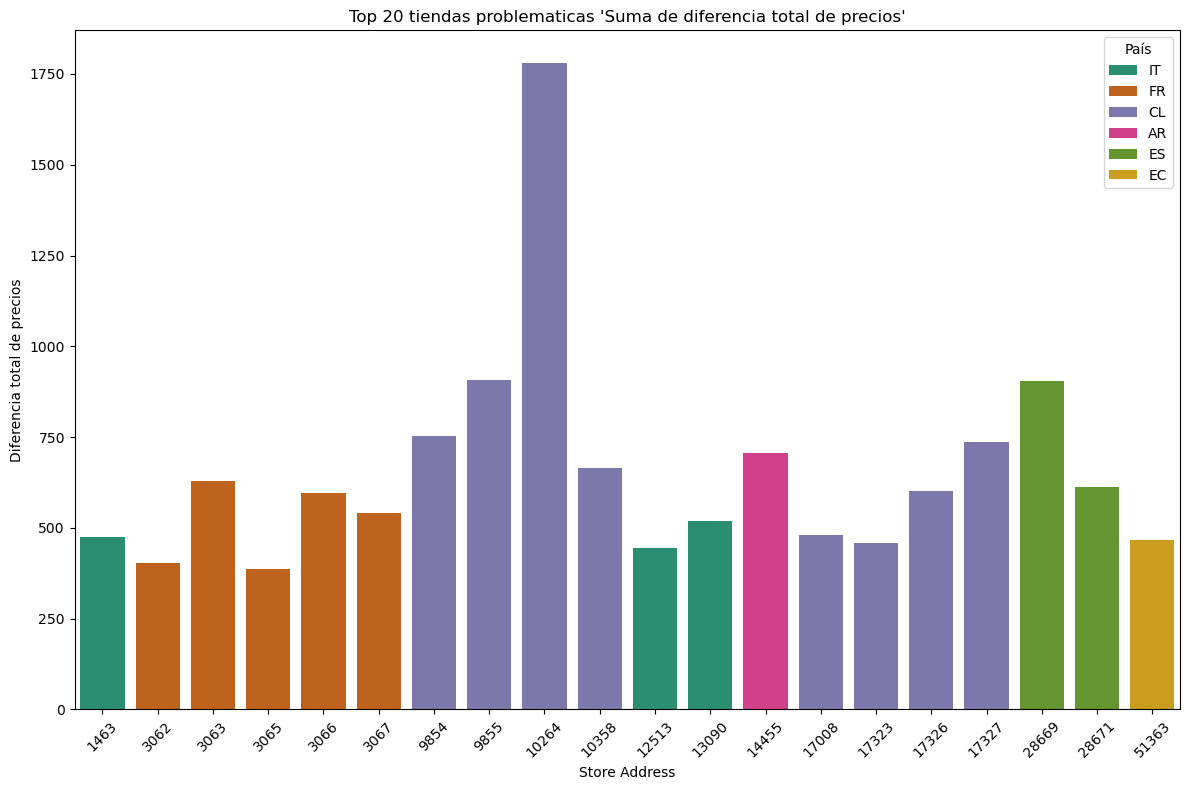

In [111]:
# Graficamos las 20 peores tiendas en terminos de diferencia de precios totales.
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_problematic_stores,
    x='store_address', 
    y='diferencia precios',
    hue='country_code',
    palette='Dark2'
)
plt.xlabel("Store Address")
plt.ylabel("Diferencia total de precios")
plt.title("Top 20 tiendas problematicas 'Suma de diferencia total de precios'")
plt.legend(title="País")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

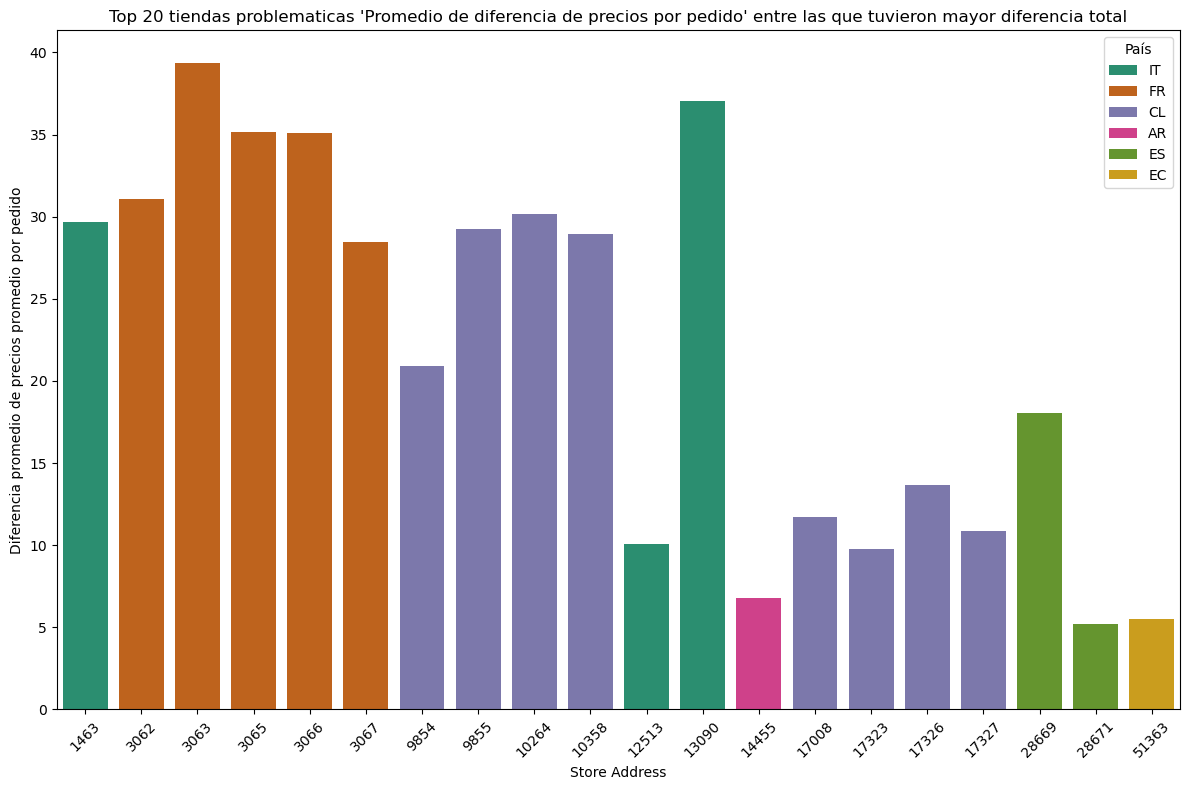

In [109]:
# Graficamos la diferencia promedio por orden de las 20 peores tiendas en terminos de diferencia de precios totales.
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_problematic_stores,
    x='store_address', 
    y='dif_prom',
    hue='country_code',
palette='Dark2')
plt.xlabel("Store Address")
plt.ylabel("Diferencia promedio de precios promedio por pedido")
plt.title("Top 20 tiendas problematicas 'Promedio de diferencia de precios por pedido' entre las que tuvieron mayor diferencia total")
plt.legend(title="País")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Clasificamos las 20 peores tiendas en terminos de diferencia promedio de precios por orden.
top_problematic_stores_avg = df_tiendas_prom_dif.sort_values(by=['dif_prom','order_id'], ascending=[True, True])
top_problematic_stores_avg = top_problematic_stores_avg[:20]
top_problematic_stores_avg['diferencia precios'] = top_problematic_stores_avg['diferencia precios'].abs()
top_problematic_stores_avg['dif_prom'] = top_problematic_stores_avg['dif_prom'].abs()
top_problematic_stores_avg

,country_code,store_address,diferencia precios,order_id,dif_prom
1379,ES,1584,203.90,1,203.900000
3535,UA,73805,69.19,1,69.190000
2219,IT,10328,135.00,2,67.500000
1188,EG,45258,52.07,1,52.070000
1012,EC,36937,82.63,2,41.315000
2594,PE,48107,40.59,1,40.590000
1989,FR,3063,630.00,16,39.375000
852,CL,31717,155.72,4,38.930000
1478,ES,8086,38.00,1,38.000000
898,CL,73776,37.68,1,37.680000


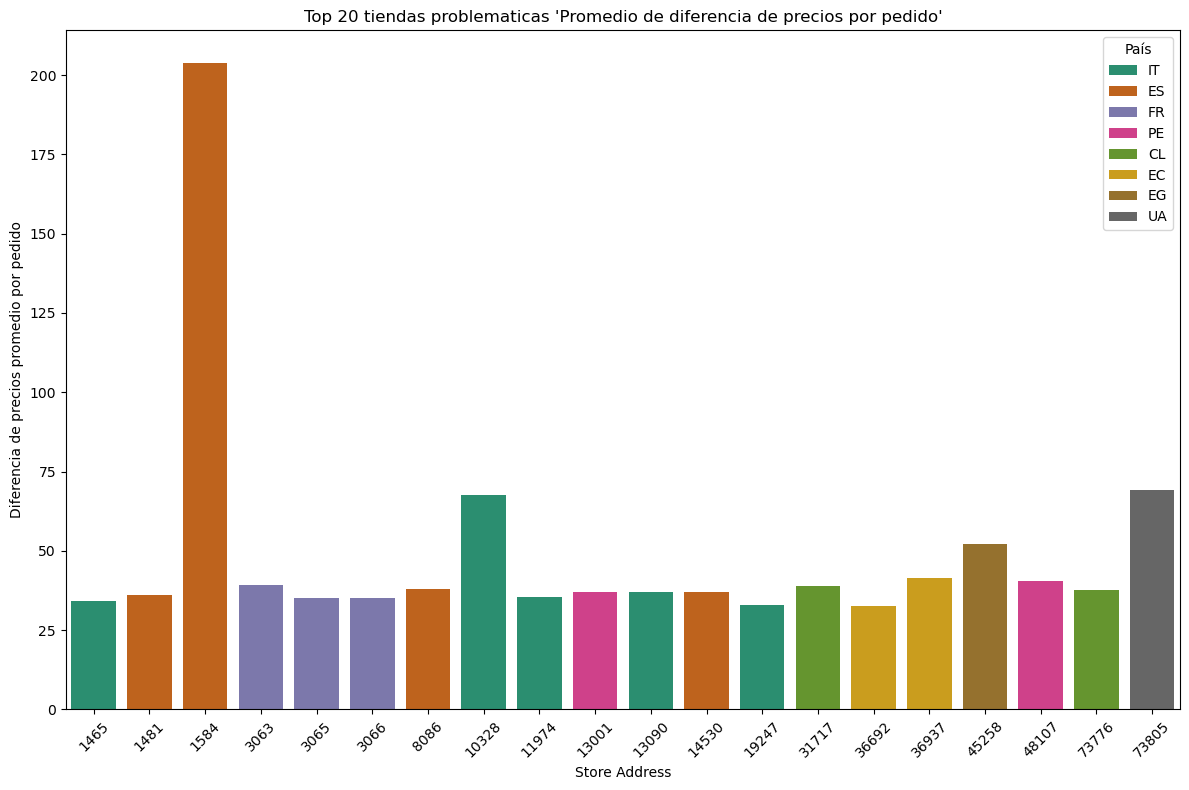

In [107]:
# Graficamos las 20 peores tiendas en terminos de diferencia promedio de precios por orden.
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_problematic_stores_avg,
    x='store_address', 
    y='dif_prom',
    hue='country_code',
    palette='Dark2'
)
plt.xlabel("Store Address")
plt.ylabel("Diferencia de precios promedio por pedido")
plt.title("Top 20 tiendas problematicas 'Promedio de diferencia de precios por pedido'")
plt.legend(title="País")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Respuesta 4.5:
``¿Qué tiendas son las más problemáticas en términos de pedidos y valor monetario?``

Desde el punto de vista de pérdidas totales, las más problemáticas se encuentran en Colombia, con un valor de diferencia que asciende a 1781.13 la mayor.

Por otro lado si consideramos la tienda que posee mas pedida en promedio por operacion nos encontramos con la tienda 1584 de España, con una diferencia de 203,90 en una sola orden.

In [32]:
# Clasificamos los pedidos cancelados
pedidos_cancelados = df_delivery[df_delivery['final_status'] == 'CanceledStatus']
pedidos_cancelados.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.0,12.95
8,33557565,2019-03-10 23:53:55.000000,AR,27750,CanceledStatus,PAID,1,2.59,0.0,2.59
10,33557508,2019-03-10 23:52:55.000000,AR,13040,CanceledStatus,PAID,2,5.73,0.0,5.73
14,33560467,2019-03-10 23:51:46.000000,PE,51257,CanceledStatus,PAID,1,5.38,0.0,5.38
17,33530108,2019-03-10 23:49:29.000000,FR,4444,CanceledStatus,PAID,2,13.50,0.0,13.50


In [33]:
# Clasificamos los pedidos cancelados subatorizados
pedidos_cancelados_subautorizados = pedidos_cancelados[pedidos_cancelados['products_total'] < pedidos_cancelados['purchase_total_price']]
pedidos_cancelados_subautorizados.tail()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios
59394,32012190,2019-03-01 12:15:12.000000,UA,58911,CanceledStatus,NOT_PAID,4,16.04,20.74,-4.70
59441,32009363,2019-03-01 12:09:01.000000,TR,61964,CanceledStatus,PAID,4,6.31,6.68,-0.37
59557,32014315,2019-03-01 11:48:50.000000,ES,1497,CanceledStatus,PAID,1,9.95,19.99,-10.04
59773,32012126,2019-03-01 11:11:05.000000,ES,234,CanceledStatus,PAID,1,3.30,3.90,-0.60
60274,31990380,2019-03-01 09:03:01.000000,RO,72651,CanceledStatus,PAID,1,3.79,3.90,-0.11


In [34]:
# Clasificamos los pedidos suabtorizados del total de pedidos
pedidos_subautorizados_totales = df_delivery[df_delivery['products_total'] < df_delivery['purchase_total_price']]
pedidos_subautorizados_totales

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,-0.08
6,33511759,2019-03-10 23:55:21.000000,TR,47493,DeliveredStatus,PAID,2,2.37,2.45,-0.08
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,-2.10
...,...,...,...,...,...,...,...,...,...,...
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,-3.45
60388,32002620,2019-03-01 00:14:57.000000,AR,62623,DeliveredStatus,PAID,2,1.79,5.36,-3.57
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67


In [35]:
# Agregamos una columna binaria para indicar si el pedido fue cancelado o no
pedidos_subautorizados_totales['CanceledStatus'] = pedidos_subautorizados_totales['final_status'].apply(lambda x: 1 if x == 'CanceledStatus' else 0)
pedidos_subautorizados_totales.head()

C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_13200\166633529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_subautorizados_totales['CanceledStatus'] = pedidos_subautorizados_totales['final_status'].apply(lambda x: 1 if x == 'CanceledStatus' else 0)


,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,diferencia precios,CanceledStatus
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,0
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,-0.08,0
6,33511759,2019-03-10 23:55:21.000000,TR,47493,DeliveredStatus,PAID,2,2.37,2.45,-0.08,0
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12,0
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,-2.10,0


In [36]:
# Calculamos la correlación entre la diferencia de precios y los pedidos cancelados
correlation = pedidos_subautorizados_totales['diferencia precios'].corr(pedidos_subautorizados_totales['CanceledStatus'])
print('Respuesta 4.6:')
print("Correlación entre diferencia de precio y cancelación:", correlation)

Respuesta 4.6:
Correlación entre diferencia de precio y cancelación: -0.12372122903768017


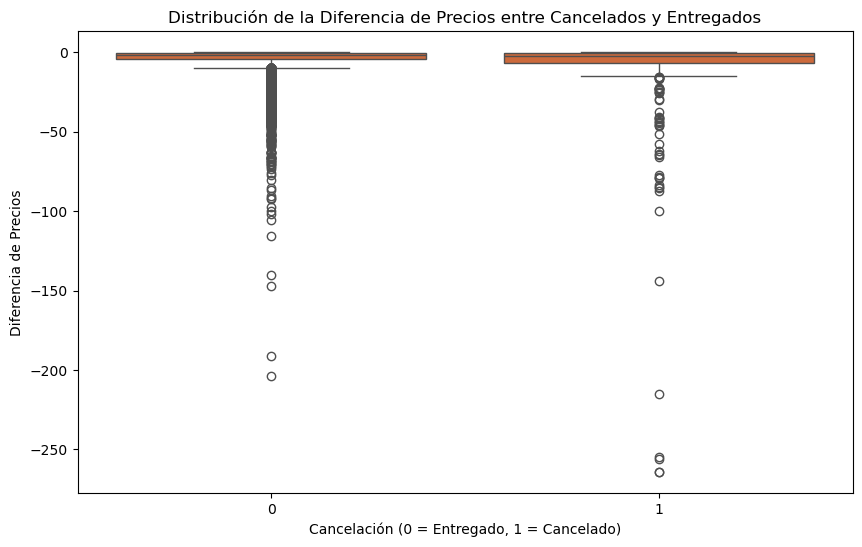

In [87]:
# Graficamos para verificar que no existe la correlación
plt.figure(figsize=(10,6))
sns.boxplot(x='CanceledStatus', y='diferencia precios', data=pedidos_subautorizados_totales, color='#e46124')
plt.title("Distribución de la Diferencia de Precios entre Cancelados y Entregados")
plt.xlabel("Cancelación (0 = Entregado, 1 = Cancelado)")
plt.ylabel("Diferencia de Precios")
plt.show()

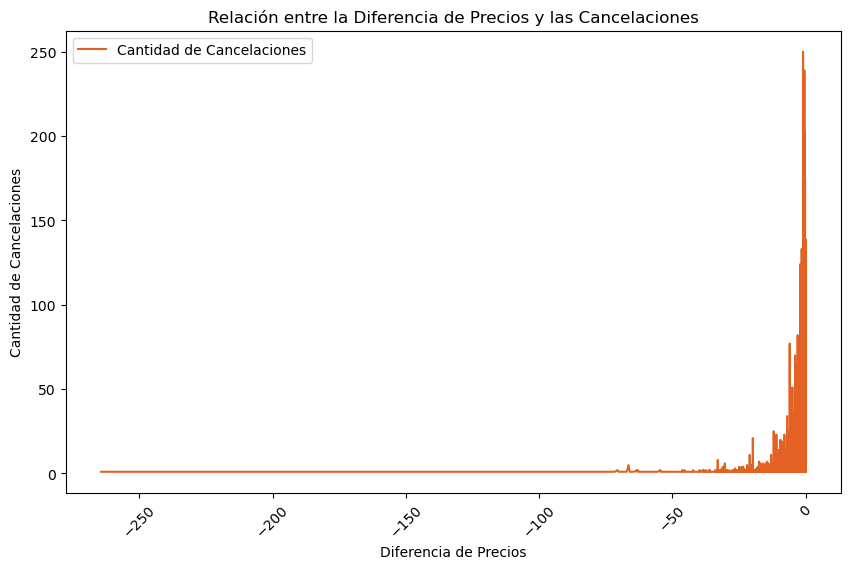

In [89]:
# Graficamos para verificar que no existe la correlación
cancelaciones_por_precio = pedidos_subautorizados_totales.groupby('diferencia precios')['CanceledStatus'].count()
plt.figure(figsize=(10,6))
plt.plot(cancelaciones_por_precio.index, cancelaciones_por_precio, label="Cantidad de Cancelaciones", color='#e46124')
plt.title("Relación entre la Diferencia de Precios y las Cancelaciones")
plt.xlabel("Diferencia de Precios")
plt.ylabel("Cantidad de Cancelaciones")
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()

#### Respuesta 4.6
``Para los pedidos subautorizados, ¿hay una correlación entre la diferencia en los precios y la cancelación del pedido? En otras palabras: ¿Es más probable que se cancele un pedido a medida que aumenta la diferencia de precio?``

Dado que el cálculo de correlación dió un resultado de -0.12372122903768017 podemos decir que no existe la misma.
Para una mayor claridad hemos graficado los datos.
Estos mismos dejan en evidencia que a medida que aumenta la diferencia de precios no aumentan los pedidos cancelados.

### 3. Experimento
Nos gustaría medir el impacto de aumentar la tarifa de entrega de pedidos en una ciudad dada (sin considerar el valor de los productos), de €1.9 a €2.1, en los KPIs de la empresa.

Se te pide diseñar el experimento desde la etapa conceptual, planificar el análisis empírico y presentar las recomendaciones según los resultados del experimento.

Explica en detalle cómo abordarías esta tarea, enfocándote en lo siguiente:

¿Qué tipo de prueba requeriría esto?
¿Probarías esto solo en nuevos usuarios o en todos los usuarios activos? ¿Por qué?
¿Qué suposiciones harías y cómo probarías si estas suposiciones son correctas?
¿Qué enfoque usarías para determinar la duración del experimento?
¿Qué KPIs/métricas elegirías para evaluar el éxito de la prueba?
¿Qué pasos tomarías para analizar los resultados de la prueba?
¿Cuáles serían tus recomendaciones según los resultados de la prueba?

#### Respuesta 3.

Esto requeriria una prueba de A/B testing.

Lo probaría tanto en usuarios nuevos como en activos, para que ambos grupos posean características similares.

Supondría que existe la posibilidad de que el uso del servicio baje debido al incremento de la tarifa.
Para corroborar la teoría realizaría la prueba A/B, separando un grupo de testeo con caracteristicas similares al grupo original. A una parte del cual le aplicariía las nuevas tarifas y evaluaría su comportamiento; para luego compararlo con los valores de la otra parte del grupo al que no se le cambio la tarifa.

Para determinar la duración del experimento es importante considerar un periodo de tiempo acorde, que sea lo suficientemente amplio para observar cuando los valores comiencen a estabilizarse. Es importante Calcular el Efecto Mínimo Detectable (EMD) para definir el tanto el tamaño de la muestra, como la duración de la misma.

Para evaluar el éxito de la prueba sería interensate poder analizar la cantidad de pedidos realizados junto a su tasa de finalización, el valor promedio de compras y en caso de ser posible la frecuencia de uso de los clientes. 
Para analizar los resultados de las pruebas optaría para hacer graficas comparativas enfocandome en los KPis que deseo analizar. Por ejemplo, un gráfico de barras para representar la cantidad de pedidos realizados junto a su tasa de finalización por cada grupo.

Dependiendo los resultados de las pruebas y de la postura de la empresa, tambien sería interensate analizar los ingresos totales generados, ya que aunque baje un poco el uso de nuestro servicio, pero la facturación se mantenga, podría implementarse el cambio, el cual siginificaría mayor beneficio a menor cantidad de trabajo.
Por lo tanto si nuestros ingresos se mantienen sería una buena opción.
Por otro lado si los usuarios siguen haciendo uso de nuestro servicio significaría que están contentos por el servicio y dispuestos a pagar ese aumento.
Si el consumo baja demasiado, se podría hacer otro test con un incremento menor.



### Respuesta 2

#### Extras para Presentación

In [52]:
Pedidos_entregados = df_delivery[df_delivery['final_status'] == 'DeliveredStatus']
Tasa_finalizacion = len(Pedidos_entregados) / len(df_delivery)
Tasa_finalizacion = Tasa_finalizacion *100
print(f'La tasa de finalización de es del: {Tasa_finalizacion:.2f}%')

La tasa de finalización de es del: 89.24%


In [54]:
Pagos_rechazados = df_delivery[df_delivery['payment_status'] == 'NOT_PAID']
Tasa_pagos_rechazados = len(Pagos_rechazados) / len(df_delivery_aceptados)
Tasa_pagos_rechazados = Tasa_pagos_rechazados * 100
print(f'La tasa de pagos rechazados de es del: {Tasa_pagos_rechazados:.2f}%')

La tasa de pagos rechazados de es del: 1.00%


In [55]:
df_tiendas_compras = df_delivery_aceptados.groupby('country_code').agg({'purchase_total_price': 'mean','products': 'mean'}).reset_index()
df_tiendas_compras = df_tiendas_compras.sort_values(by='purchase_total_price', ascending=False)
df_tiendas_compras

,country_code,purchase_total_price,products
12,IT,18.394149,3.887346
9,FR,17.965574,2.550739
15,PA,15.805796,2.631166
3,CL,15.713393,2.021990
8,ES,15.613300,4.423811
19,RO,15.414980,2.994965
17,PR,14.572069,1.689655
22,UY,13.589091,2.111888
16,PE,13.172601,1.876453
11,GT,12.845926,1.695906


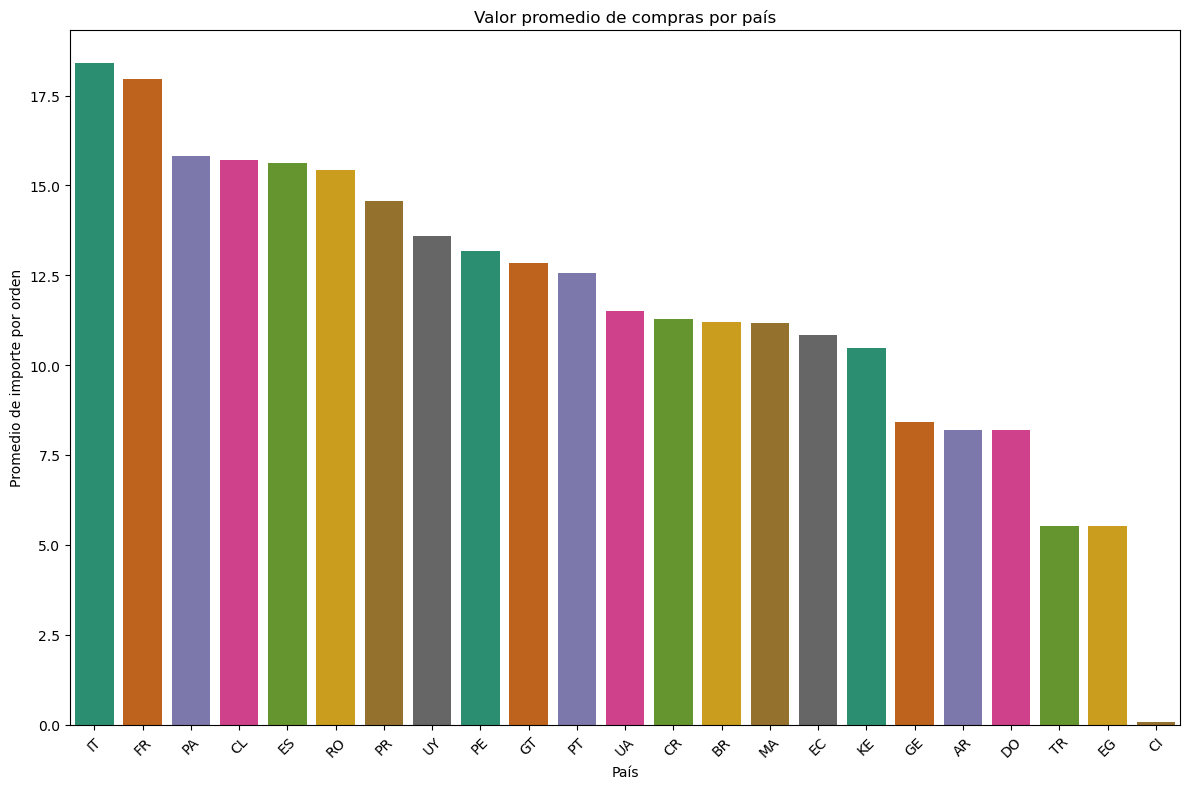

In [117]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_tiendas_compras,
    x='country_code', 
    y='purchase_total_price',
    hue= 'country_code',
    palette= 'Dark2'
)
plt.xlabel("País")
plt.ylabel("Promedio de importe por orden")
plt.title("Valor promedio de compras por país")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

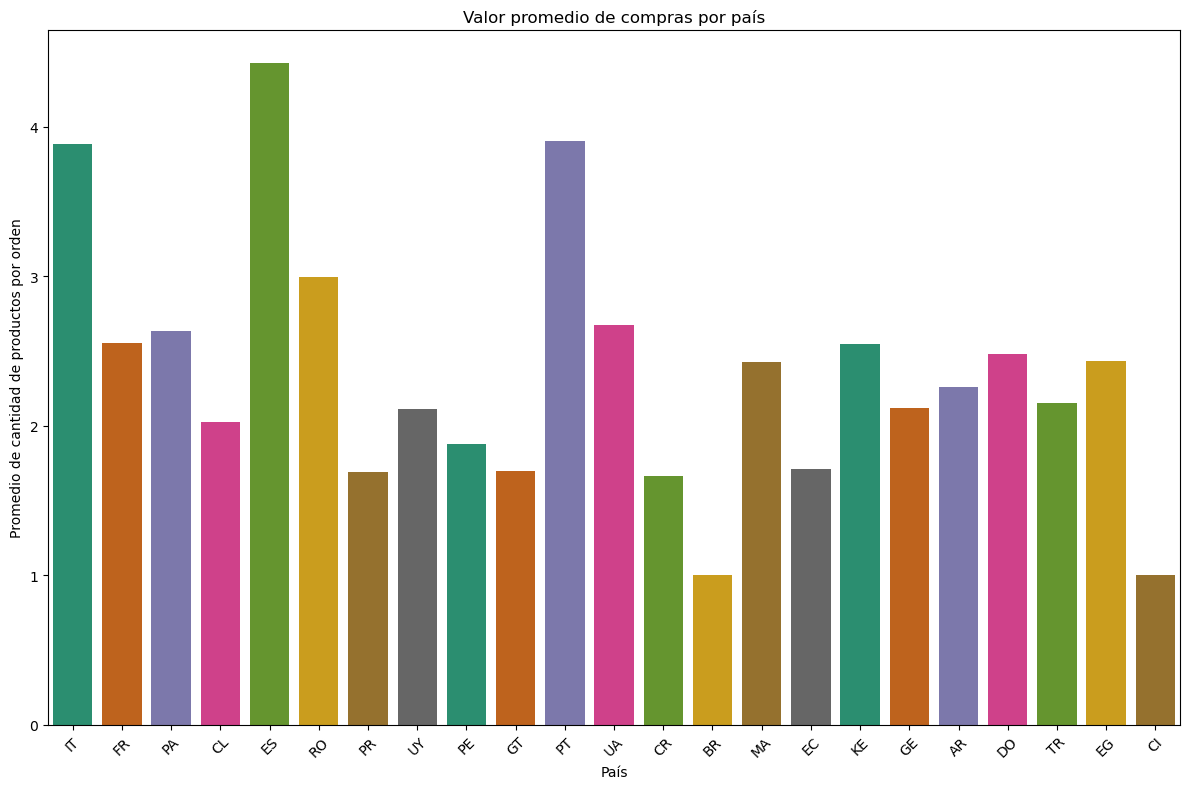

In [119]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_tiendas_compras,
    x='country_code', 
    y='products',
    hue= 'country_code',
    palette= 'Dark2'
)
plt.xlabel("País")
plt.ylabel("Promedio de cantidad de productos por orden")
plt.title("Valor promedio de compras por país")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
avg_products = df_tiendas_compras['products'].mean()
print(f' El promedio de articulos por compra es de: {avg_products:.2f}')

 El promedio de articulos por compra es de: 2.36


In [69]:
avg_importe = df_tiendas_compras['purchase_total_price'].mean()
print(f' El promedio de importe por compra es de: {avg_importe:.2f}')

 El promedio de importe por compra es de: 11.65
